In [ ]:
#Local
data_dir = 'C:/FSI/Googlecolab/dataset2'
train_dir = 'C:/FSI/Googlecolab/dataset2/train'
val_dir ='C:/FSI/Googlecolab/dataset2/val'
test_dir = 'C:/FSI/Googlecolab/dataset2/test'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/IAIMAGESFSI/dataset2'
train_dir = '/content/drive/MyDrive/IAIMAGESFSI/dataset2/train'
val_dir ='/content/drive/MyDrive/IAIMAGESFSI/dataset2/val'
test_dir = '/content/drive/MyDrive/IAIMAGESFSI/dataset2/test'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Rescaling,Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import random
import tensorflow as tf

# Establecer semillas para NumPy y TensorFlow
seed1 = 47190
np.random.seed(seed=seed1)
random.seed(seed1)
tf.random.set_seed(seed1)

image_size = 150
batch_size = 32
rescale_factor = 1./255

# Leer imágenes y etiquetas
def load_images_and_labels(directory):
    images = []
    labels = []
    class_folders = os.listdir(directory)
    class_folders.sort()

    for i, folder in enumerate(class_folders):
        class_path = os.path.join(directory, folder)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (image_size, image_size))
                img = img / 255.0  # Normalizar los valores de píxeles
                images.append(img)
                labels.append(i)

    return np.array(images), np.array(labels)

# Cargar imágenes de entrenamiento
train_images, train_labels = load_images_and_labels(train_dir)

# Cargar imágenes de validación
val_images, val_labels = load_images_and_labels(val_dir)

# Cargar imágenes de prueba
test_images, test_labels = load_images_and_labels(test_dir)

# Dividir conjunto de entrenamiento en entrenamiento y validación
#train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=seed1)


Epoch 1/200
123/123 [==============================] - 16s 51ms/step - loss: 1.9012 - accuracy: 0.1974 - val_loss: 1.8093 - val_accuracy: 0.3061
Epoch 2/200
123/123 [==============================] - 5s 43ms/step - loss: 1.6558 - accuracy: 0.3281 - val_loss: 1.5575 - val_accuracy: 0.4388
Epoch 3/200
123/123 [==============================] - 5s 38ms/step - loss: 1.4752 - accuracy: 0.4059 - val_loss: 1.3926 - val_accuracy: 0.5265
Epoch 4/200
123/123 [==============================] - 5s 38ms/step - loss: 1.3623 - accuracy: 0.4753 - val_loss: 1.2822 - val_accuracy: 0.5612
Epoch 5/200
123/123 [==============================] - 5s 43ms/step - loss: 1.3074 - accuracy: 0.5000 - val_loss: 1.2309 - val_accuracy: 0.5796
Epoch 6/200
123/123 [==============================] - 5s 38ms/step - loss: 1.2524 - accuracy: 0.5273 - val_loss: 1.1935 - val_accuracy: 0.5786
Epoch 7/200
123/123 [==============================] - 5s 38ms/step - loss: 1.1915 - accuracy: 0.5551 - val_loss: 1.1469 - val_accuracy

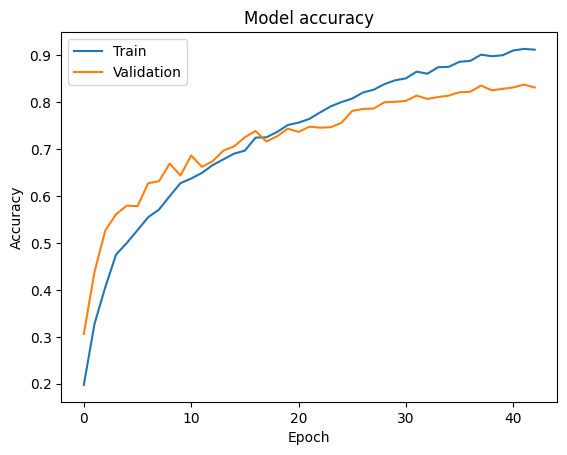

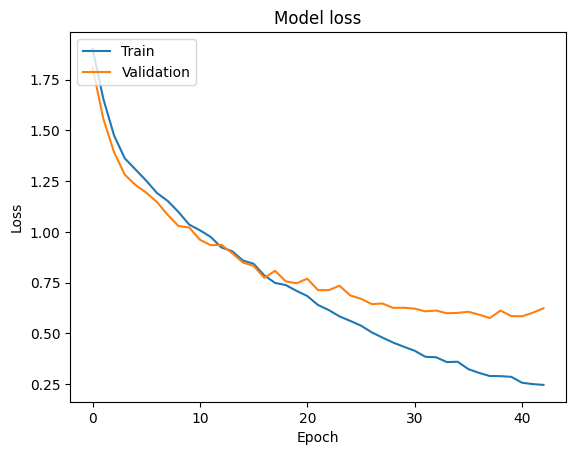

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(len(os.listdir(train_dir)), activation='softmax'))

# Compilar el modelo con un optimizador diferente y tasa de aprendizaje más baja
custom_optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resto del código para entrenar, evaluar y visualizar

epochs= 200

# Crear el objeto EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo con Early Stopping
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                    validation_data=(val_images, val_labels), callbacks=[early_stopping])


# Evaluar el modelo en datos de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Puedes usar history para visualizar la precisión y pérdida durante el entrenamiento
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


44/44 [==============================] - 0s 9ms/step
Matriz de Confusión:
[[114  11  26  39   3   5   2]
 [  4 145  10   7   8  26   0]
 [ 14   3 171   2   7   2   1]
 [ 30   9  12 103  37   4   5]
 [  5   5  22  31 119  16   2]
 [  0   1   2   3   4 173  17]
 [  2   1   0   5   1  20 171]]


<Axes: >

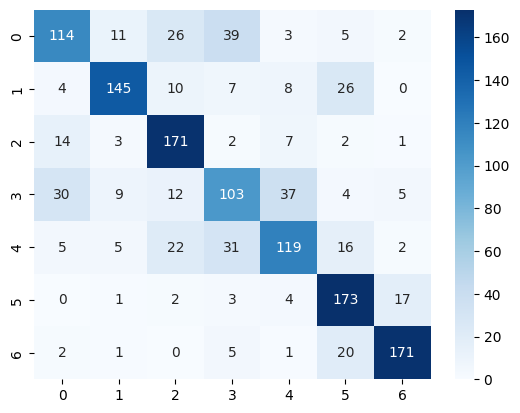

In [ ]:
from sklearn.metrics import confusion_matrix

# Supongamos que ya has entrenado tu modelo y tienes imágenes de prueba y etiquetas de prueba
# Asegúrate de que el modelo está definido y entrenado antes de ejecutar esta parte del código

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(test_images)

# Obtener las etiquetas predichas (índice de la clase con mayor probabilidad)
predicted_labels = np.argmax(predictions, axis=1)

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Visualizar la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")



In [ ]:
import matplotlib.pyplot as plt

def generatePlot(history):
    # Extracción de datos
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Creación del gráfico de accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training')
    plt.plot(epochs, val_acc, 'r', label='Validation')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    #plt.ylim(0, 1)  # Establecer límites en el eje y de 0 a 1

    # Creación del gráfico de loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training')
    plt.plot(epochs, val_loss, 'r', label='Validation')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    #plt.ylim(0, 1)  # Establecer límites en el eje y de 0 a 1

    plt.tight_layout()
    plt.show()

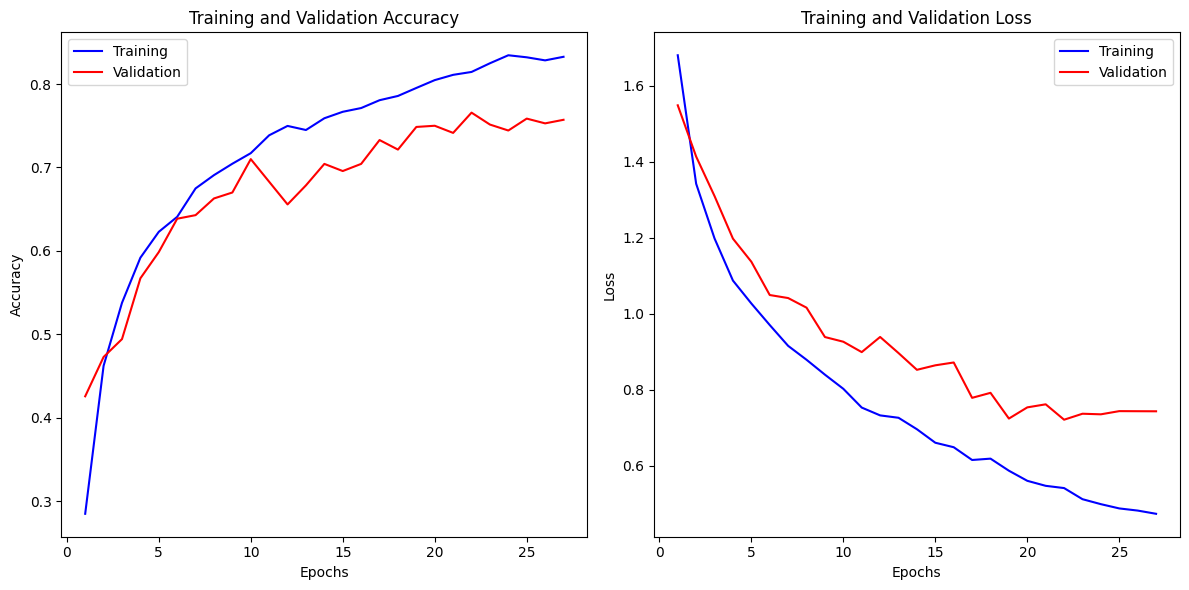

In [ ]:
generatePlot(history)